<a href="https://colab.research.google.com/github/lopespaloma/predicao-avc-projeto-datascience/blob/main/projeto_A3_previsao_avc_k_means_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TREINAMENTO MODELO - K-Means

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans

In [ ]:
#arquivo csv - https://drive.google.com/file/d/1VY7XIUMhQGYHPhgkNGyS0AnUqR0yae-u/view?usp=sharing
avc = pd.read_csv('dataset-avc-kmeans.csv', delimiter= ',')
avc.columns

Index(['Genero', 'Idade', 'Hipertensao', 'Doenca Cardiaca', 'Estado Civil',
       'Tipo de trabalho', 'Localizacao Residencial', 'Nivel medio de glicose',
       'IMC', 'Condicao de fumante', 'AVC'],
      dtype='object')

In [ ]:
avc.describe()

,Genero,Idade,Hipertensao,Doenca Cardiaca,Estado Civil,Tipo de trabalho,Localizacao Residencial,Nivel medio de glicose,IMC,Condicao de fumante,AVC
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.413894,43.226614,0.097456,0.054012,0.656164,1.278669,0.491977,106.147677,28.862035,0.500783,0.048728
std,0.492578,22.612647,0.296607,0.226063,0.475034,0.857785,0.499985,45.283560,7.699562,0.772331,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,0.000000,91.885000,28.100000,0.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,114.090000,32.800000,1.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,97.600000,2.000000,1.000000


In [ ]:
#Separando do dataframe registros de pacientes que não tiveram avc, isto é = 0
avc_negativo = avc.loc[avc['AVC'] == 0]
avc_negativo = avc_negativo.sample(n=249)
avc_negativo

,Genero,Idade,Hipertensao,Doenca Cardiaca,Estado Civil,Tipo de trabalho,Localizacao Residencial,Nivel medio de glicose,IMC,Condicao de fumante,AVC
2608,0,56.0,0,0,1,1,1,77.66,40.8,0,0
475,0,81.0,0,0,0,1,1,69.01,32.6,0,0
1659,1,63.0,0,0,1,1,0,199.14,28.5,0,0
3827,0,40.0,0,0,1,1,0,72.12,38.0,0,0
1651,0,64.0,0,0,1,2,1,114.47,31.6,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3223,0,47.0,0,0,1,1,0,93.18,42.6,2,0
3552,1,25.0,0,0,1,1,1,66.51,29.2,0,0
1646,0,48.0,0,1,1,2,0,101.22,28.1,2,0
1431,0,76.0,0,0,1,3,1,84.21,24.4,0,0


In [ ]:
#Separando do dataframe registros de pacientes que tiveram avc, isto é = 1
avc_positivo = avc.loc[avc['AVC'] == 1]
avc_positivo

,Genero,Idade,Hipertensao,Doenca Cardiaca,Estado Civil,Tipo de trabalho,Localizacao Residencial,Nivel medio de glicose,IMC,Condicao de fumante,AVC
0,1,67.0,0,1,1,1,0,228.69,36.6,2,1
1,0,61.0,0,0,1,2,1,202.21,28.1,0,1
2,1,80.0,0,1,1,1,1,105.92,32.5,0,1
3,0,49.0,0,0,1,1,0,171.23,34.4,1,1
4,0,79.0,1,0,1,2,1,174.12,24.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
244,1,57.0,0,0,1,1,1,84.96,36.7,0,1
245,0,14.0,0,0,0,0,1,57.93,30.9,0,1
246,0,75.0,0,0,1,2,1,78.80,29.3,2,1
247,1,71.0,1,0,1,2,1,87.80,28.1,0,1


In [ ]:
#Concatenando os registros totais e randomizando valores
avc = pd.concat([avc_positivo, avc_negativo], ignore_index=True)
avc = avc.sample(frac=1).reset_index(drop=True)
avc

,Genero,Idade,Hipertensao,Doenca Cardiaca,Estado Civil,Tipo de trabalho,Localizacao Residencial,Nivel medio de glicose,IMC,Condicao de fumante,AVC
0,0,61.0,0,0,1,2,0,73.36,16.1,0,0
1,0,75.0,0,1,0,2,0,109.78,28.1,0,1
2,1,68.0,1,1,1,1,1,271.74,31.1,1,1
3,0,75.0,0,0,1,3,0,62.48,28.1,0,1
4,0,79.0,0,0,1,1,1,169.67,28.1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
493,0,68.0,0,0,0,3,0,82.10,27.1,0,1
494,1,59.0,0,0,1,3,1,231.95,33.2,0,0
495,0,69.0,1,1,0,2,0,72.17,36.8,0,1
496,0,54.0,0,0,1,1,0,104.51,27.3,1,1


# Agrupamento | K-Means

## Por Idade e IMC

In [ ]:
'''Segmentação por Idade e IMC'''
X1 = avc[['Idade' , 'IMC']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

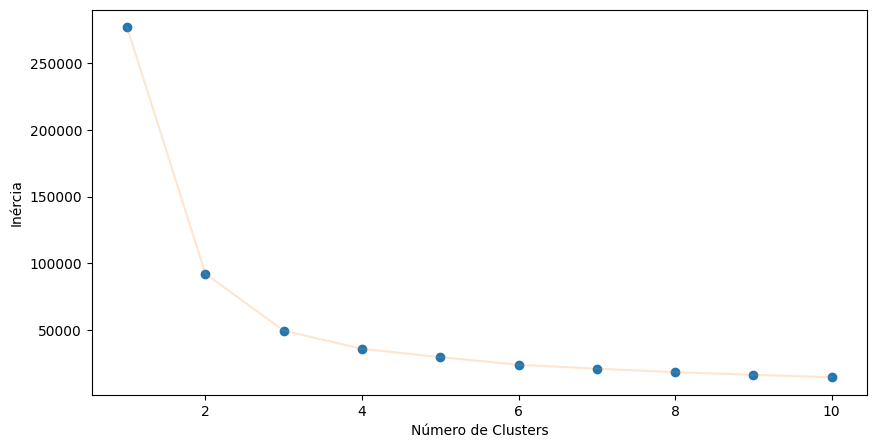

In [ ]:
plt.figure(1 , figsize = (10 ,5))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.2)
plt.xlabel('Número de Clusters') , plt.ylabel('Inércia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

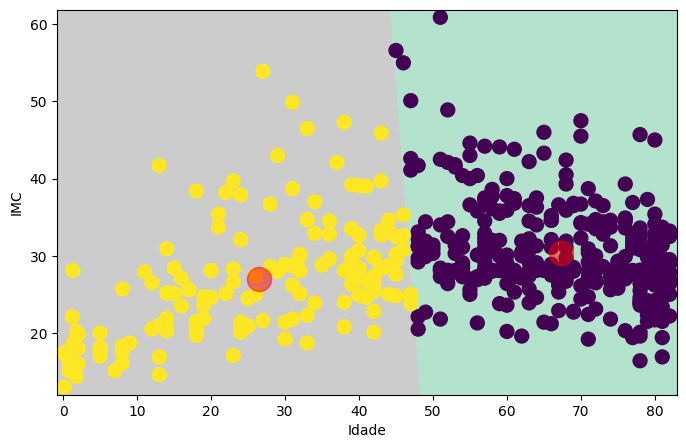

In [ ]:
plt.figure(1 , figsize = (8 , 5) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = 'Idade', y = 'IMC', data = avc, c = labels1 ,
            s = 100 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('IMC') , plt.xlabel('Idade')
plt.show()

## Por Idade e Nível Médio de Glicose

In [ ]:
X2 = avc[['Doenca Cardiaca' , 'Hipertensao']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

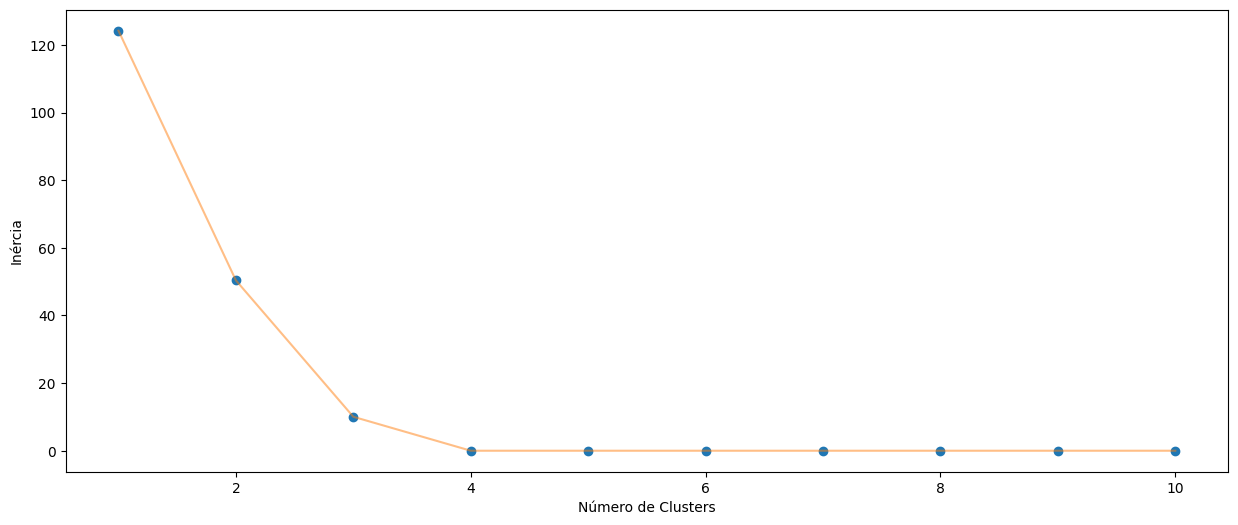

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Inércia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

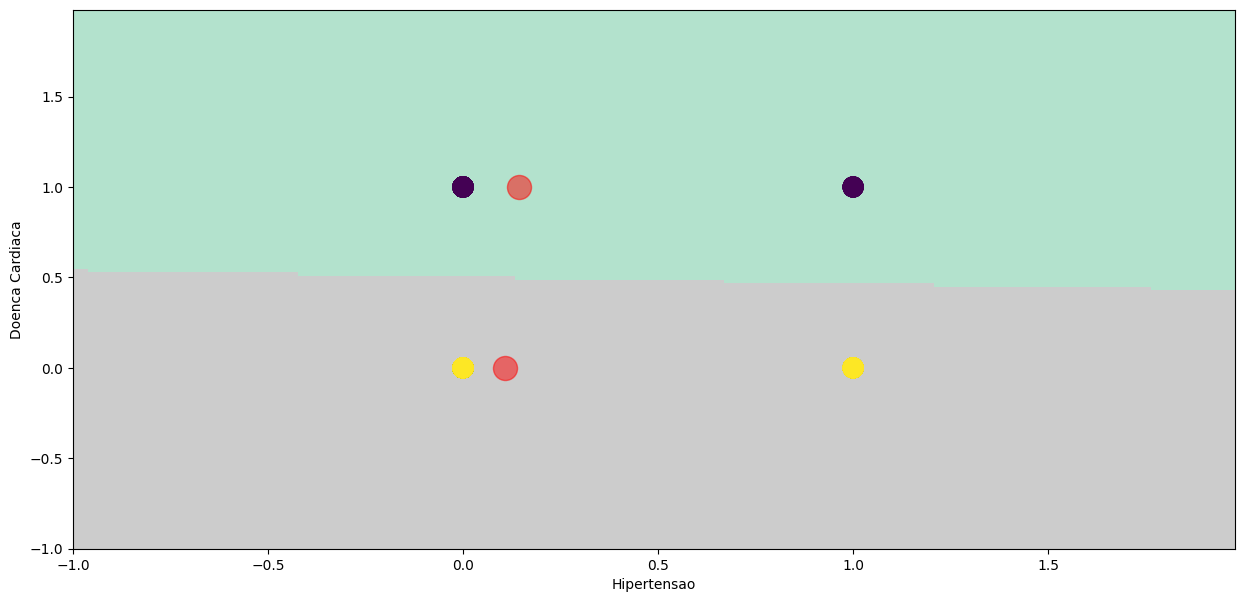

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Doenca Cardiaca' ,y = 'Hipertensao' , data = avc , c = labels2 ,
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Doenca Cardiaca') , plt.xlabel('Hipertensao')
plt.show()